# Chapter 6: Advanced Logistic Regression and Extensions

This notebook provides practical "recipes" for logistic regression and extensions of it applied to multiclass and multilabel tasks in scikit-learn. Each recipe includes explanations, code examples, visualizations, best practices, and common pitfalls. We'll cover implementation, tuning, and evaluation of linear regression and regularization models.

## Overview of Logistic Regression

### Getting ready
To get started, we’ll need a classification dataset to illustrate the basics of logistic regression implementation in scikit-learn. We’ll use the Breast Cancer dataset included in the scikit-learn library. This is also (yet another) commonly used toy data set for illustrating ML applications.

In [45]:
# Load libraries 
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target

# Convert to DataFrame for easier manipulation (optional)
df = pd.DataFrame(X, columns=data.feature_names)
df['target'] = y

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(df[data.feature_names], 
                                                    df['target'], 
                                                    test_size=0.2, 
                                                    random_state=2024)

### How to do it
As we’ve seen before (and will continue to see), loading a model in scikit-learn is as simple as instantiating the Class in a variable and building from there.

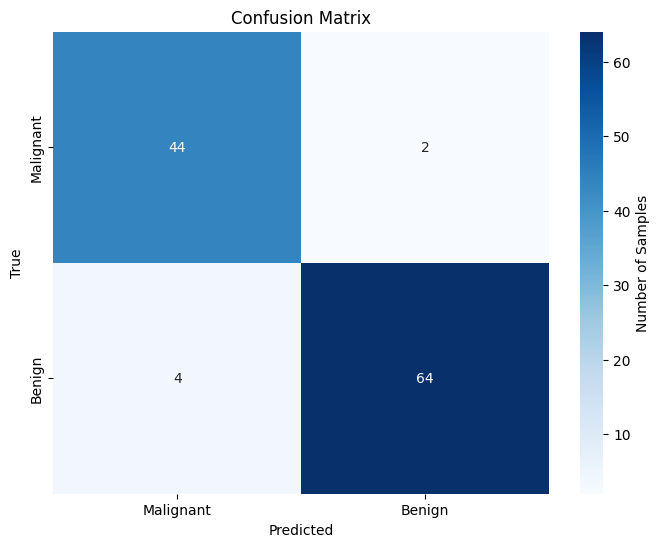

Accuracy: 0.95


Classification Report:


,precision,recall,f1-score,support
Malignant,0.917,0.957,0.936,46
Benign,0.970,0.941,0.955,68
accuracy,0.947,0.947,0.947,1
macro avg,0.943,0.949,0.946,114
weighted avg,0.948,0.947,0.948,114


In [46]:
# Create a Logistic Regression Model 
model = LogisticRegression(max_iter=10000) # Increase max_iter if convergence issues occur 

# Train the Model 
model.fit(X_train, y_train)

# Make Predictions 
y_pred = model.predict(X_test) 

# Evaluate Performance
accuracy = accuracy_score(y_test, y_pred)

# Generate and plot confusion matrix
class_names = ['Malignant', 'Benign']
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names,
            yticklabels=class_names, 
            cbar_kws={'label': 'Number of Samples'})
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Get classification report as a dictionary
report_dict = classification_report(y_test, y_pred,
                                  target_names=class_names, 
                                  output_dict=True)

# Create a DataFrame for better visualization
report_df = pd.DataFrame(report_dict).transpose()

# Style the DataFrame
styled_df = (report_df
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}', 
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)

print(f'Accuracy: {accuracy:.2f}\n')
print("\nClassification Report:")
display(styled_df)

### How it works
Logistic regression operates by estimating probabilities through a linear combination of input features transformed by the logistic function. The coefficients obtained during training represent how much each feature contributes to predicting the probability of belonging to a particular class.

The decision boundary created by logistic regression is linear in terms of “log-odds” but can effectively separate classes in many binary classification scenarios. When visualizing results, plotting predicted probabilities against actual outcomes can provide insights into how well the model distinguishes between classes.

## Multiclass Classification Techniques

### Getting ready
To get started, we’ll once again utilize a dataset we’ve used before: the Iris dataset. This dataset contains three classes so it’s perfect for this basic illustration of multiclass classification.

In [47]:
# Load the libraries
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.inspection import DecisionBoundaryDisplay
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it
We will implement both One-vs-Rest (OvR) and Multinomial Logistic Regression.

In [48]:
# Create and train an OvR Logistic Regression model
ovr_model = LogisticRegression(solver='liblinear')
ovr_model.fit(X_train, y_train)

# Create and train and Multinomial Logistic Regression model
multinomial_model = LogisticRegression(solver='lbfgs', max_iter = 1000)
multinomial_model.fit(X_train, y_train)

# Make predictions with the OvR model
y_pred_ovr = ovr_model.predict(X_test)

# Make predictions with the Multinomial model
y_pred_multinomial = multinomial_model.predict(X_test)

# Evaluate the OvR model
accuracy_ovr = accuracy_score(y_test, y_pred_ovr)
report_ovr = pd.DataFrame(classification_report(y_test, y_pred_ovr, output_dict=True)).transpose()
print("One-vs-Rest (OvR) Logistic Regression:")

styled_ovr = (report_ovr
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}',
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)
display(styled_ovr)

# Evaluate the Multinomial model
accuracy_multinomial = accuracy_score(y_test, y_pred_multinomial)
report_multinomial = pd.DataFrame(classification_report(y_test, y_pred_multinomial, output_dict=True)).transpose()
print("Multinomial Logistic Regression:")

styled_multinomial = (report_multinomial
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}',
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)
display(styled_multinomial)

One-vs-Rest (OvR) Logistic Regression:


c:\Users\john\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:1288: FutureWarning: Using the 'liblinear' solver for multiclass classification is deprecated. An error will be raised in 1.8. Either use another solver which supports the multinomial loss or wrap the estimator in a OneVsRestClassifier to keep applying a one-versus-rest scheme.
  warnings.warn(


,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,0.917,0.917,0.917,12
2,0.933,0.933,0.933,15
accuracy,0.956,0.956,0.956,1
macro avg,0.950,0.950,0.950,45
weighted avg,0.956,0.956,0.956,45


Multinomial Logistic Regression:


,precision,recall,f1-score,support
0,1.000,1.000,1.000,18
1,0.846,0.917,0.880,12
2,0.929,0.867,0.897,15
accuracy,0.933,0.933,0.933,1
macro avg,0.925,0.928,0.926,45
weighted avg,0.935,0.933,0.934,45


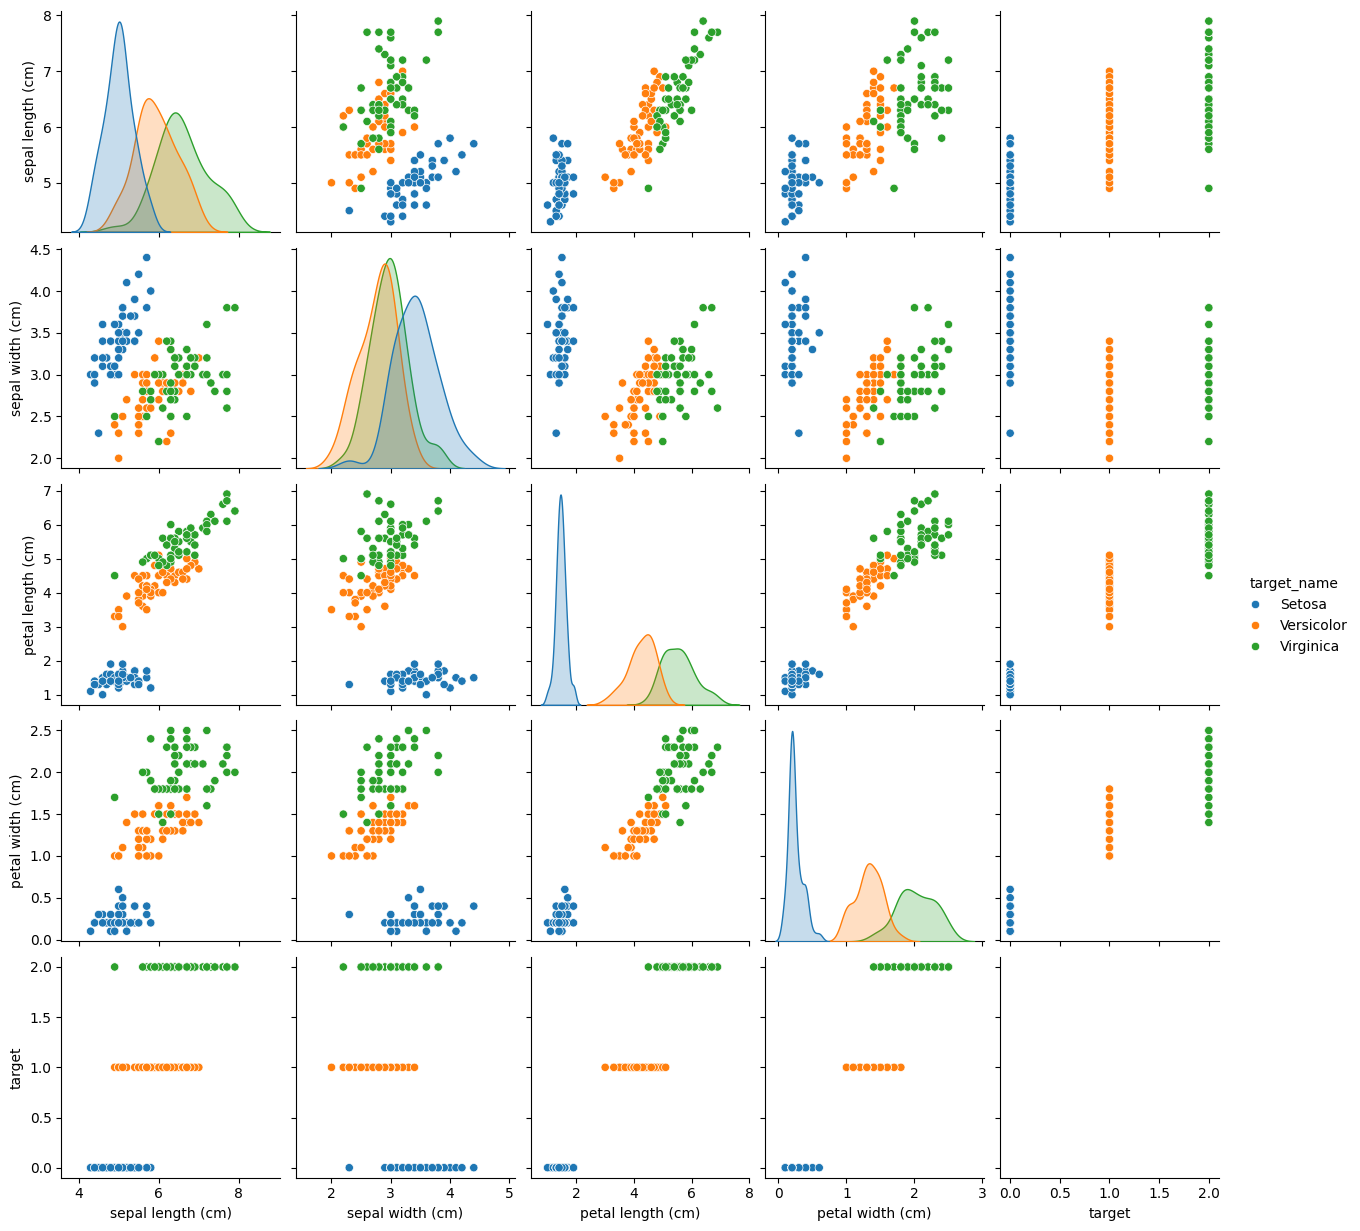

In [49]:
# Create a pairplot to visualize the data 
target_names = {0: 'Setosa', 1: 'Versicolor', 2: 'Virginica'}
df['target_name'] = df['target'].map(target_names)
sns.pairplot(df, hue='target_name', diag_kind='kde')
plt.show()

### How it works…
We implemented two different approaches here, OvR and Multinomial, so let’s discuss the details in more detail.

* **One-vs-Rest (OvR) Logistic Regression:** One-vs-Rest (also known as “One-vs-All”) involves training a separate binary classifier for each class. For each classifier, the instances of that class are treated as the positive class, and the instances of all other classes are treated as the negative class. During prediction, the classifier with the highest confidence score is selected.

* **Multinomial Logistic Regression:** Multinomial logistic regression, also known as “SoftMax Regression,” directly models the probability of each class using a SoftMax function. It estimates multiple regression coefficients, one for each class, and optimizes them simultaneously. This approach is more suitable when the classes are mutually exclusive.


## Regularization in Logistic Regression 

### Getting ready
Before implementing regularized logistic regression, let's ensure we have the necessary Python libraries installed and the dataset loaded. We’ll jump back to using the Breast Cancer dataset again.

In [50]:
# Load the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the dataset and scale it
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

### How to do it
Now, let's implement Ridge (L2) and Lasso (L1) regularized logistic regression models.

In [51]:
# Create and train a Ridge (L2) regularized Logistic Regression model
ridge_model = LogisticRegression(penalty='l2', solver='liblinear', C=0.1)
ridge_model.fit(X_train, y_train)

# Create and train a Lasso (L1) regularized Logistic Regression model
lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=0.1)
lasso_model.fit(X_train, y_train)

# Make predictions with the Ridge model
y_pred_ridge = ridge_model.predict(X_test)

# Make predictions with the Lasso model
y_pred_lasso = lasso_model.predict(X_test)

# Evaluate the Ridge model
accuracy_ridge = accuracy_score(y_test, y_pred_ridge)
report_ridge = pd.DataFrame(classification_report(y_test, y_pred_ridge, output_dict=True)).transpose()
print("Ridge (L2) Regularized Logistic Regression:")

styled_ridge = (report_ridge
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}',
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)
display(styled_ridge)

# Evaluate the Lasso model
accuracy_lasso = accuracy_score(y_test, y_pred_lasso)
report_lasso = pd.DataFrame(classification_report(y_test, y_pred_lasso, output_dict=True)).transpose()
print("Lasso (L1) Regularized Logistic Regression:")

styled_lasso = (report_lasso
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}',
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)
display(styled_lasso)


Ridge (L2) Regularized Logistic Regression:


,precision,recall,f1-score,support
0,0.985,0.970,0.977,67
1,0.981,0.990,0.986,104
accuracy,0.982,0.982,0.982,1
macro avg,0.983,0.980,0.982,171
weighted avg,0.982,0.982,0.982,171


Lasso (L1) Regularized Logistic Regression:


,precision,recall,f1-score,support
0,0.930,0.985,0.957,67
1,0.990,0.952,0.971,104
accuracy,0.965,0.965,0.965,1
macro avg,0.960,0.968,0.964,171
weighted avg,0.966,0.965,0.965,171


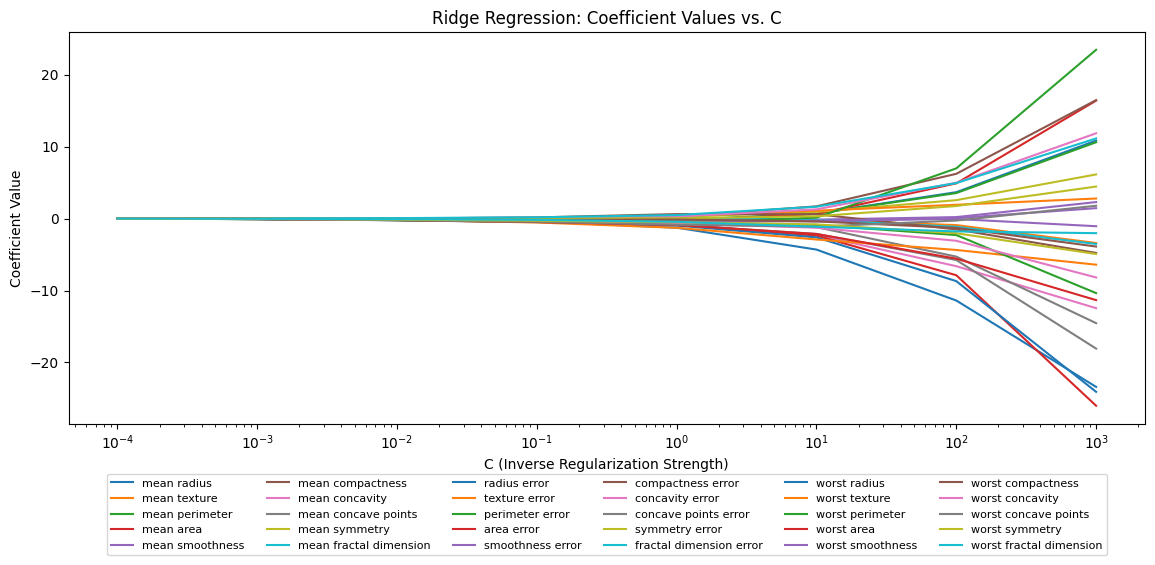

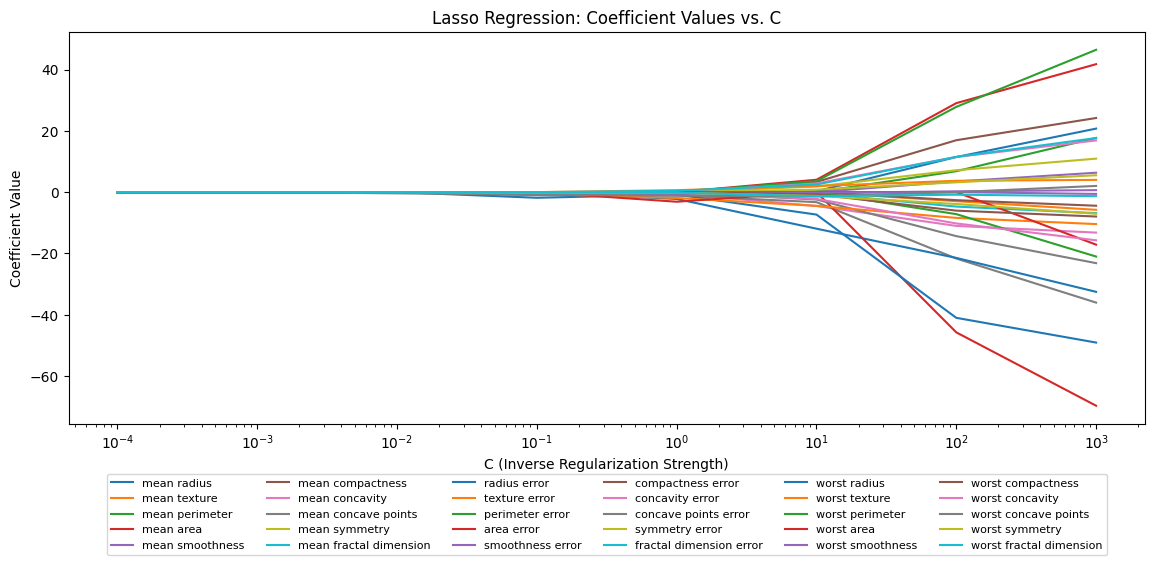

In [52]:
# Plotting coefficients for different C values (Ridge)
C_values = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])
coefs_ridge = []

for C in C_values:
    ridge_model = LogisticRegression(penalty='l2', solver='liblinear', C=C)
    ridge_model.fit(X_train, y_train)
    coefs_ridge.append(ridge_model.coef_[0])

plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.plot(C_values, [coef[i] for coef in coefs_ridge], label=feature_names[i])
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Ridge Regression: Coefficient Values vs. C')
plt.legend(bbox_to_anchor=(0.5, -0.35), ncol=6, loc='lower center', fontsize=8)
plt.tight_layout()
plt.show()

# Plotting coefficients for different C values (Lasso)
C_values = np.array([0.0001, 0.001, 0.01, 0.1, 1, 10, 100, 1000])
coefs_lasso = []

for C in C_values:
    lasso_model = LogisticRegression(penalty='l1', solver='liblinear', C=C)
    lasso_model.fit(X_train, y_train)
    coefs_lasso.append(lasso_model.coef_[0])

plt.figure(figsize=(12, 6))
for i in range(X.shape[1]):
    plt.plot(C_values, [coef[i] for coef in coefs_lasso], label=feature_names[i])
plt.xscale('log')
plt.xlabel('C (Inverse Regularization Strength)')
plt.ylabel('Coefficient Value')
plt.title('Lasso Regression: Coefficient Values vs. C')
plt.legend(bbox_to_anchor=(0.5, -0.35), ncol=6, loc='lower center', fontsize=8)
plt.tight_layout()
plt.show()


### How it works

Regularization adds a penalty term to the loss function, which discourages the model from assigning overly large coefficients to the features. This helps prevent overfitting, where the model performs well on the training data but poorly on unseen data.
* **Ridge (L2) Regularization:** Adds a penalty proportional to the square of the magnitude of the coefficients. This shrinks the coefficients towards zero but rarely sets them exactly to zero.
* **Lasso (L1) Regularization:** Adds a penalty proportional to the absolute value of the coefficients. This can lead to sparse models by driving some coefficients to exactly zero, effectively performing feature selection.

The C parameter in LogisticRegression() controls the inverse of the regularization strength; smaller values specify stronger regularization.


## Multilabel Classification Concepts

### Getting ready
Before we start implementing multilabel classification techniques, let’s ensure we have the necessary Python libraries installed and the dataset loaded. We’re going to generate our own dataset for this example recipe.

In [53]:
# Load the libraries
from sklearn.datasets import make_multilabel_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
X, y = make_multilabel_classification(n_samples=1000, n_features=20, n_classes=5, n_labels=2, random_state=2024)
df = pd.DataFrame(X, columns=[f'feature_{i}' for i in range(X.shape[1])])
df['target'] = list(y)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it...
Now let's implement multilabel logistic regression using the One-vs-Rest (OvR) strategy.

In [54]:
# Since we have multiple labels, we need to train a separate model for each label
models = []
y_pred_all = []

# Train a model for each label (column) in y
for i in range(y_train.shape[1]):
    # Create and train model for this label
    model = LogisticRegression(solver='liblinear')
    model.fit(X_train, y_train[:, i])
    models.append(model)
    
    # Make predictions for this label
    y_pred_label = model.predict(X_test)
    y_pred_all.append(y_pred_label)

# Convert predictions list to array and transpose to match original format
y_pred = np.array(y_pred_all).T

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = pd.DataFrame(classification_report(y_test, y_pred, zero_division=1, output_dict=True)).transpose()
print("Classification Report:")

styled_report = (report
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}',
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)
display(styled_report)


Classification Report:


,precision,recall,f1-score,support
0,0.808,0.813,0.811,166
1,0.801,0.845,0.823,181
2,0.674,0.333,0.446,93
3,0.750,0.176,0.286,34
4,0.575,0.477,0.522,88
micro avg,0.757,0.653,0.701,562
macro avg,0.722,0.529,0.577,562
weighted avg,0.744,0.653,0.677,562
samples avg,0.787,0.782,0.680,562



Label Statistics:
Total samples: 300

Label frequencies:
Label 0: 166 samples (55.3%)
Label 1: 181 samples (60.3%)
Label 2: 93 samples (31.0%)
Label 3: 34 samples (11.3%)
Label 4: 88 samples (29.3%)

Most common label combinations:
Combination [0 0 0 0 0]: 52 samples (17.3%)
Combination [0 1 0 0 0]: 34 samples (11.3%)
Combination [1 1 0 0 0]: 28 samples (9.3%)
Combination [1 1 1 0 0]: 25 samples (8.3%)
Combination [1 1 0 0 1]: 24 samples (8.0%)


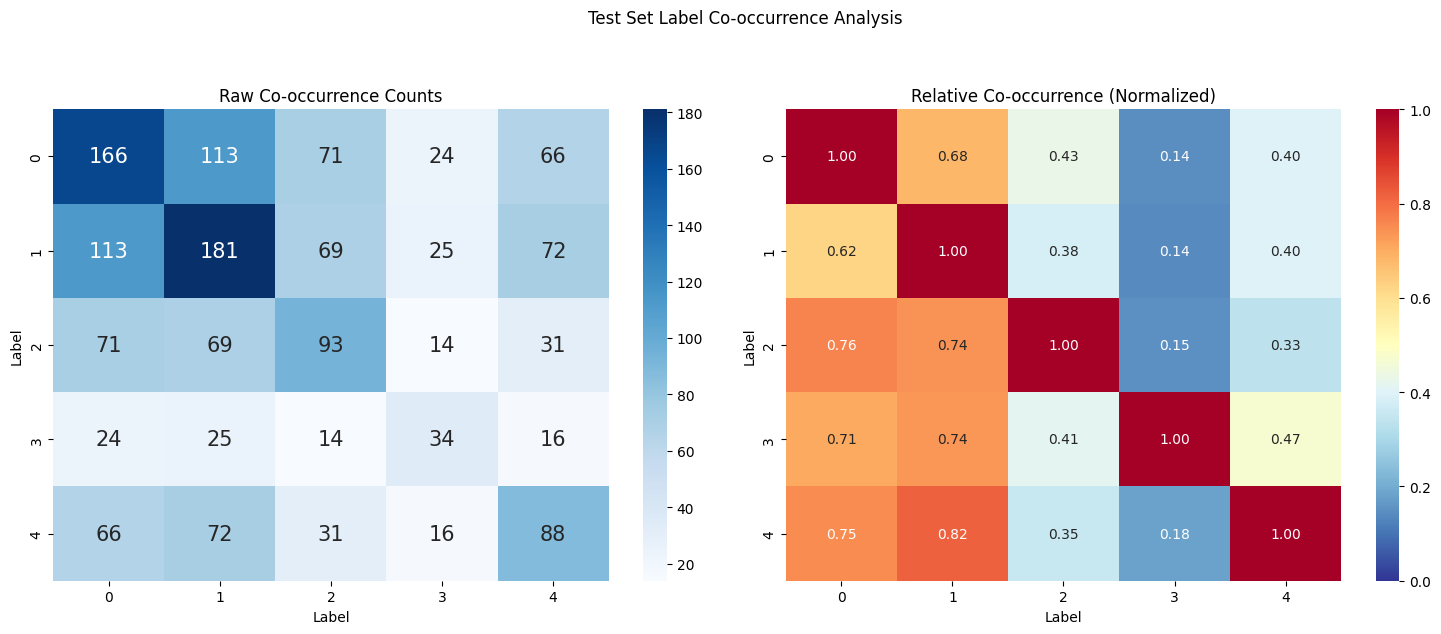

In [55]:
# Create a detailed label co-occurrence visualization
def plot_label_cooccurrence(y, title="Label Co-occurrence Analysis"):
    # Compute raw co-occurrence counts
    cooccurrence = y.T @ y
    
    # Compute relative co-occurrence (normalized by diagonal)
    # This shows what percentage of time label i occurs with label j
    diag = np.diag(cooccurrence)
    relative_cooccurrence = cooccurrence / diag[:, None]
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
    
    # Plot raw co-occurrence
    sns.heatmap(cooccurrence, annot=True, fmt='d', cmap='Blues', 
                ax=ax1, annot_kws={"fontsize": 15})
    ax1.set_title('Raw Co-occurrence Counts')
    ax1.set_xlabel('Label')
    ax1.set_ylabel('Label')
    
    # Plot relative co-occurrence
    sns.heatmap(relative_cooccurrence, annot=True, fmt='.2f', 
                cmap='RdYlBu_r', ax=ax2, annot_kws={"fontsize": 10},
                vmin=0, vmax=1)
    ax2.set_title('Relative Co-occurrence (Normalized)')
    ax2.set_xlabel('Label')
    ax2.set_ylabel('Label')
    
    plt.suptitle(title, y=1.05)
    plt.tight_layout()
    
    # Print additional statistics
    print("\nLabel Statistics:")
    print(f"Total samples: {len(y)}")
    print("\nLabel frequencies:")
    for i in range(y.shape[1]):
        count = y[:, i].sum()
        percentage = count / len(y) * 100
        print(f"Label {i}: {count} samples ({percentage:.1f}%)")
    
    print("\nMost common label combinations:")
    # Get unique combinations and their counts
    unique_combinations = np.unique(y, axis=0, return_counts=True)
    sorted_idx = np.argsort(-unique_combinations[1])  # Sort by count (descending)
    for combo, count in zip(unique_combinations[0][sorted_idx][:5], 
                          unique_combinations[1][sorted_idx][:5]):
        percentage = count / len(y) * 100
        print(f"Combination {combo}: {count} samples ({percentage:.1f}%)")

# Use the function on your test data
plot_label_cooccurrence(y_test, "Test Set Label Co-occurrence Analysis")

### How it works…

Multilabel classification involves predicting multiple binary labels for each instance. In our implementation using logistic regression with the One-vs-Rest (OvR) strategy, we train a separate binary classifier for each class label. Each classifier learns to distinguish between instances that belong to its respective class and those that do not.

The make_multilabel_classification() function generates synthetic datasets suitable for multilabel problems. The generated dataset consists of features and corresponding labels indicating the presence or absence of each class.

When evaluating our model's performance, metrics such as accuracy score and classification report provide insights into how well our model predicts multiple labels. The classification report includes precision, recall, and F1-score for each class label, allowing us to assess performance comprehensively.


## Model Evaluation Metrics 

### Getting ready
By now you probably have a fairly good idea what we need to do in order to evaluate our models using scikit-learn’s methods.

In [56]:
# Load the libraries
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, roc_curve, auc
from sklearn.datasets import load_breast_cancer
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
data = load_breast_cancer()
X = data.data
y = data.target
feature_names = data.feature_names
df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=2024)

### How to do it…
Now let's implement logistic regression and evaluate its performance using various metrics.

Accuracy 0.94
Precision 0.94
Recall 0.95
F1 Score 0.95
ROC AUC 0.99
Classification Report:


,precision,recall,f1-score,support
0,0.924,0.910,0.917,67
1,0.943,0.952,0.947,104
accuracy,0.936,0.936,0.936,1
macro avg,0.934,0.931,0.932,171
weighted avg,0.936,0.936,0.936,171


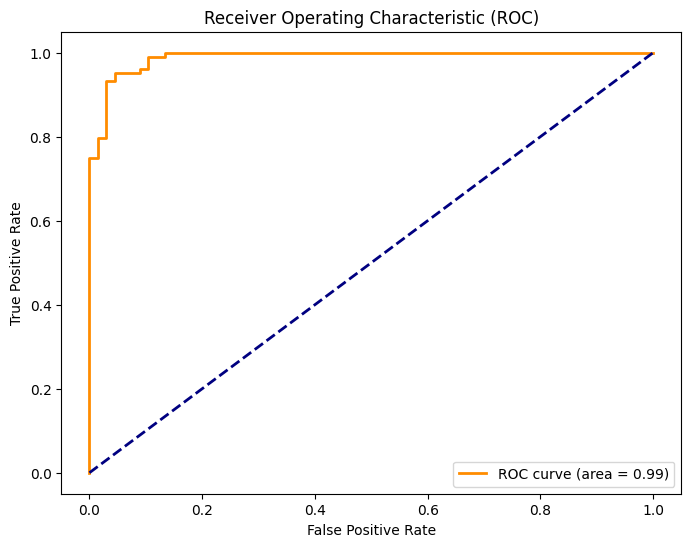

In [57]:
# Load the model
model = LogisticRegression(solver='liblinear')

# Train the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)
y_prob = model.predict_proba(X_test)[:, 1]

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
report = pd.DataFrame(classification_report(y_test, y_pred, zero_division=1, output_dict=True)).transpose()

# Print the metrics
print(f"Accuracy {accuracy:.2f}")
print(f"Precision {precision:.2f}")
print(f"Recall {recall:.2f}")
print(f"F1 Score {f1:.2f}")
print(f"ROC AUC {roc_auc:.2f}")
print("Classification Report:")

styled_report = (report
    .style
    .background_gradient(cmap='Blues', subset=['precision', 'recall', 'f1-score'])
    .format({
        'precision': '{:.3f}',
        'recall': '{:.3f}',
        'f1-score': '{:.3f}',
        'support': '{:.0f}'
    })
)
display(styled_report)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


## Practical Exercises with Advanced Logistic Regression

### Exercise 1: Implementing Ridge Regression
In this exercise, we will build a logistic regression model using the Breast Cancer dataset, applying both Lasso and Ridge regularization techniques.

In [58]:
#Load libraries
YOUR CODE HERE

# Load the dataset
YOUR CODE HERE

# Split the data
YOUR CODE HERE

# Create and train a Lasso regularized Logistic Regression model
YOUR CODE HERE

# Make predictions with the Lasso model
YOUR CODE HERE

# Evaluate the Lasso model performance
YOUR CODE HERE


SyntaxError: invalid syntax (2769327713.py, line 2)

### Exercise 2: Evaluating Multiclass Logistic Regression
In this exercise, we will implement a multinomial logistic regression model using the Iris dataset.


In [ ]:
# Load the libraries
YOUR CODE HERE

# Load the dataset
YOUR CODE HERE

# Split the data
YOUR CODE HERE

# Create and train a Multinomial Logistic Regression model
YOUR CODE HERE

# Make predictions with the Multinomial model
YOUR CODE HERE

# Evaluate the Multinomial model performance
YOUR CODE HERE


### Exercise 3: Visualizing Logistic Regression Results
In this exercise, we will visualize the decision boundaries of a logistic regression model trained on a synthetic dataset.

In [ ]:
# Load libraries for visualization and dataset creation
YOUR CODE HERE

# Create synthetic dataset for binary classification
YOUR CODE HERE

# Split the data
YOUR CODE HERE

# Create and train a Logistic Regression model
YOUR CODE HERE

# Create a mesh grid for plotting decision boundaries
YOUR CODE HERE

# Predict class probabilities across the grid
YOUR CODE HERE

# Plot decision boundaries
YOUR CODE HERE
